# First Plot Attempt
*Akira Di Sandro, 6/9/20*
<br>
First attempt at using data to plot something. Code taken mostly from Raf's tutorial notebooks.

## 1. Import python packages that we need

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import xarray as xr
xr.set_options(display_style='html')
import intake
%matplotlib inline
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

## 2. Load CMIP data to find CM4 dataset
I want this dataset to specifically have velocity data so I can plot these.

In [3]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
col

,unique
activity_id,15
institution_id,33
source_id,73
experiment_id,103
member_id,189
table_id,29
variable_id,370
grid_label,10
zstore,270390
dcpp_init_year,60


Refine Search: specifically changed the variable_id from 'tos' (sea surface temperature) to 'uo' (eastward sea water veolicty) and changed experiment_id from both 'historical and 'ssp585' to just 'historical'.

In [6]:
dog = col.search(source_id='GFDL-CM4', experiment_id='historical', table_id='Omon', grid_label='gn')
#variable_id: uo=eastward_sea_water_velocity, vo=northward_sea_water_velocity, wo=upward_sea_water_velocity
dog.df
#called dog instead of cat just because I was using Raf's code in here to help me debug & wanted my code to be different from his

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
0,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Omon,hfds,gn,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/historical/...,NaN
1,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Omon,masso,gn,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/historical/...,NaN
2,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Omon,mfo,gn,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/historical/...,NaN
3,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Omon,so,gn,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/historical/...,NaN
4,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Omon,sos,gn,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/historical/...,NaN
5,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Omon,tauuo,gn,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/historical/...,NaN
6,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Omon,tauvo,gn,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/historical/...,NaN
7,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Omon,thetao,gn,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/historical/...,NaN
8,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Omon,thetaoga,gn,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/historical/...,NaN
9,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Omon,tos,gn,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/historical/...,NaN


In [5]:
dset_dict = dog.to_dataset_dict(zarr_kwargs={'consolidated': True})
list(dset_dict.keys())

Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:00<00:00,  1.24it/s]


['CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gn']

In [6]:
CM4_hist = dset_dict['CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gn']
CM4_hist

<xarray.Dataset>
Dimensions:    (bnds: 2, lev: 35, member_id: 1, time: 1980, x: 1440, y: 1080)
Coordinates:
    time_bnds  (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    lev_bnds   (lev, bnds) float64 dask.array<chunksize=(35, 2), meta=np.ndarray>
    lat        (y, x) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
    lon        (y, x) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
  * x          (x) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * bnds       (bnds) float64 1.0 2.0
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * y          (y) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * member_id  (member_id) <U8 'r1i1p1f1'
Data variables:
    uo         (member_id, time, lev, y, x) float32 dask.array<chunksize=(1, 1, 35, 1080, 1440), meta=np.ndarray>
    vo         (member_id, time, lev, y, x) float32 dask.array<chunksize=(1, 1, 35, 1080, 1440), meta=np.ndarray>
Attributes:
    title:                   NOAA GFDL GFDL-CM4 model output prepared for CMI...
    branch_time_in_child:    0.0
    institution_id:          NOAA-GFDL
    further_info_url:        https://furtherinfo.es-doc.org/CMIP6.NOAA-GFDL.G...
    parent_variant_label:    r1i1p1f1
    realization_index:       1
    parent_mip_era:          CMIP6
    contact:                 gfdl.climate.model.info@noaa.gov
    variant_info:            N/A
    branch_time_in_parent:   36500.0
    source_type:             AOGCM
    variant_label:           r1i1p1f1
    frequency:               mon
    references:              see further_info_url attribute
    parent_experiment_id:    piControl
    forcing_index:           1
    experiment:              historical
    institution:             National Oceanic and Atmospheric Administration,...
    physics_index:           1
    branch_method:           standard
    grid:                    ocean data on native grid tripolar - nominal 0.2...
    nominal_resolution:      25 km
    data_specs_version:      01.00.27
    experiment_id:           historical
    tracking_id:             hdl:21.14100/d0ebcd36-d2cd-442e-a8d9-8f7a27168a2...
    realm:                   ocean
    activity_id:             CMIP
    source_id:               GFDL-CM4
    initialization_index:    1
    license:                 CMIP6 model data produced by NOAA-GFDL is licens...
    mip_era:                 CMIP6
    parent_time_units:       days since 0001-1-1
    product:                 model-output
    table_id:                Omon
    comment:                 <null ref>
    Conventions:             CF-1.7 CMIP-6.0 UGRID-1.0
    status:                  2019-08-06;created;by nhn2@columbia.edu
    grid_label:              gn
    parent_activity_id:      CMIP
    history:                 File was processed by fremetar (GFDL analog of C...
    parent_source_id:        GFDL-CM4
    source:                  GFDL-CM4 (2018): \naerosol: interactive\natmos: ...
    sub_experiment:          none
    sub_experiment_id:       none
    intake_esm_dataset_key:  CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gn

## 3. Specify parameters
I realized, unlike figure 5a of Alberty et al. 2019, I will be making a plot of the zonal component of the velocity fields. So, instead of averaging the values of 'uo' across lat and lon in addition to time, it makes more sense to me to look at a specific lon (represented by x here) and a range of lat (represented by y) and average the time (above, I averaged the 'uo' across all 2012 timestamps which I think I will keep). Once these parameters are specified, I will make a plot with lat (y) on the x-axis and depth (lev) on the y-axis with a color-coded plot of magnitude of 'uo', the u component of velocity averaged over the year 2012.
<br> Use cmaps='bwr' for blue to white to red.

I wanted to bring the coordinates table closer to what I'll be working on to specify parameters so that I don't have to scroll all the time.

In [7]:
try1 = CM4_hist['uo'].sel(time='2012').mean(dim='time').sel(y=slice(-12.0,-2.0)).sel(x=-180.0, 
                                                                    method='nearest')
try1

<xarray.DataArray 'uo' (member_id: 1, lev: 35, y: 40)>
dask.array<getitem, shape=(1, 35, 40), dtype=float32, chunksize=(1, 35, 40), chunktype=numpy.ndarray>
Coordinates:
    lat        (y) float32 dask.array<chunksize=(40,), meta=np.ndarray>
    lon        (y) float32 dask.array<chunksize=(40,), meta=np.ndarray>
    x          float64 -180.1
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * y          (y) float64 -11.91 -11.67 -11.42 -11.18 ... -2.749 -2.499 -2.249
  * member_id  (member_id) <U8 'r1i1p1f1'

In [8]:
from dask.distributed import Client
from dask_gateway import Gateway


gateway = Gateway()  # connect to Gateway

cluster = gateway.new_cluster()  # create cluster
cluster.scale(10)  # scale cluster

client = Client(cluster)  # connect Client to Cluster

In [9]:
client

Client Scheduler: gateway://traefik-ocean-prod-dask-gateway.ocean-prod:80/ocean-prod.fbe9984e2a4c45b484c349224e3d5537 Dashboard: https://ocean.pangeo.io/services/dask-gateway/clusters/ocean-prod.fbe9984e2a4c45b484c349224e3d5537/status,Cluster Workers: 1 Cores: 2 Memory: 4.29 GB


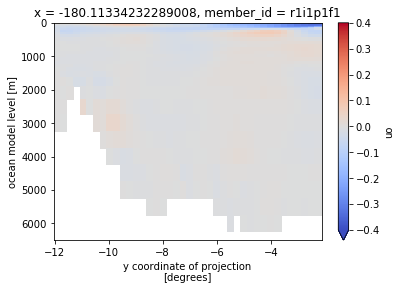

In [12]:
try1.plot(vmin=-0.4, vmax=0.4, cmap='coolwarm', ylim=(6500,0))

### Plotting a Surface Field
This makes it easier to visualize x and y, specifically how they map out the oceans.

Might need a Dask computer cluster to do this mapping since there is a lot of data.

In [13]:
surf_map = CM4_hist['uo'].sel(lev=2.5, time=CM4_hist.time[0])
surf_map

<xarray.DataArray 'uo' (member_id: 1, y: 1080, x: 1440)>
dask.array<getitem, shape=(1, 1080, 1440), dtype=float32, chunksize=(1, 1080, 1440), chunktype=numpy.ndarray>
Coordinates:
    lat        (y, x) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
    lon        (y, x) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
  * x          (x) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
    time       object 1850-01-16 12:00:00
    lev        float64 2.5
  * y          (y) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * member_id  (member_id) <U8 'r1i1p1f1'
Attributes:
    cell_methods:   time: mean
    interp_method:  none
    long_name:      Sea Water X Velocity
    original_name:  uo
    standard_name:  sea_water_x_velocity
    units:          m s-1

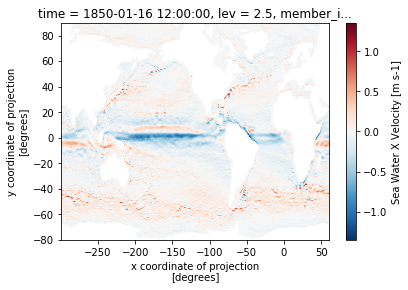

In [14]:
surf_map.plot()

* change parameters to get a bigger figure and/or zoom in on specified section of this map

In [13]:
client.close()
cluster.close()